<a href="https://colab.research.google.com/github/torimonn/hands-on/blob/main/%E3%83%87%E3%83%BC%E3%82%BF%E3%82%B3%E3%83%B3%E3%83%9A%E5%8B%89%E5%BC%B7%E4%BC%9A%E3%82%B3%E3%83%B3%E3%83%9A%E3%83%87%E3%83%BC%E3%82%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **利用するライブラリを準備**

In [11]:
# ライブラリのインストール
!pip install -qu google-generativeai
#!pip install # Gemini以外のLLMAPIを使う場合はモデルに適したライブラリをインストール


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [12]:
# ライブラリのインポート
import google.generativeai as genai # 生成AIモデルのGeminiを利用するためのコード
#import # Gemini以外のLLMAPIを使う場合はモデルに適したライブラリをインポート
from google.colab import userdata # 環境変数からAPIキーを取得するためのコード

# **APIキーの設定**
●事前に行うこと

・https://ai.google.dev/aistudio?hl=ja　にアクセスしてログイン
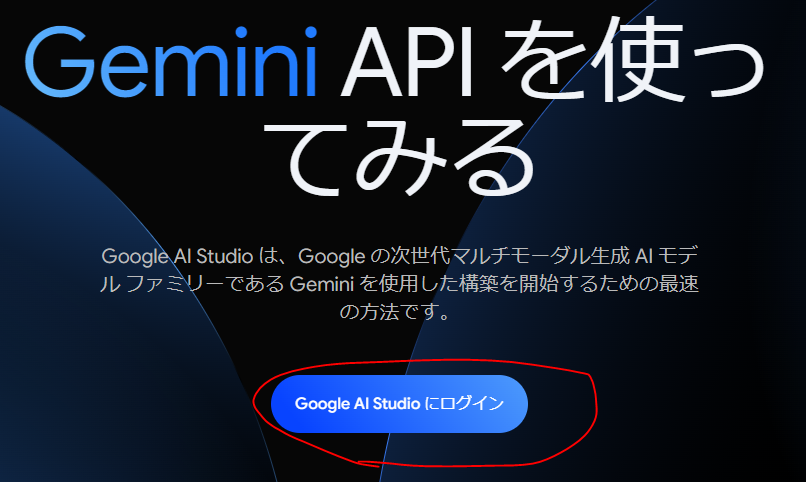

・Get API Key →　APIキーを作成　でAPIキーを作成し、作成したAPIキーをコピー　プロジェクト名は適当でOK、APIキーは公開したりせず扱いに注意する
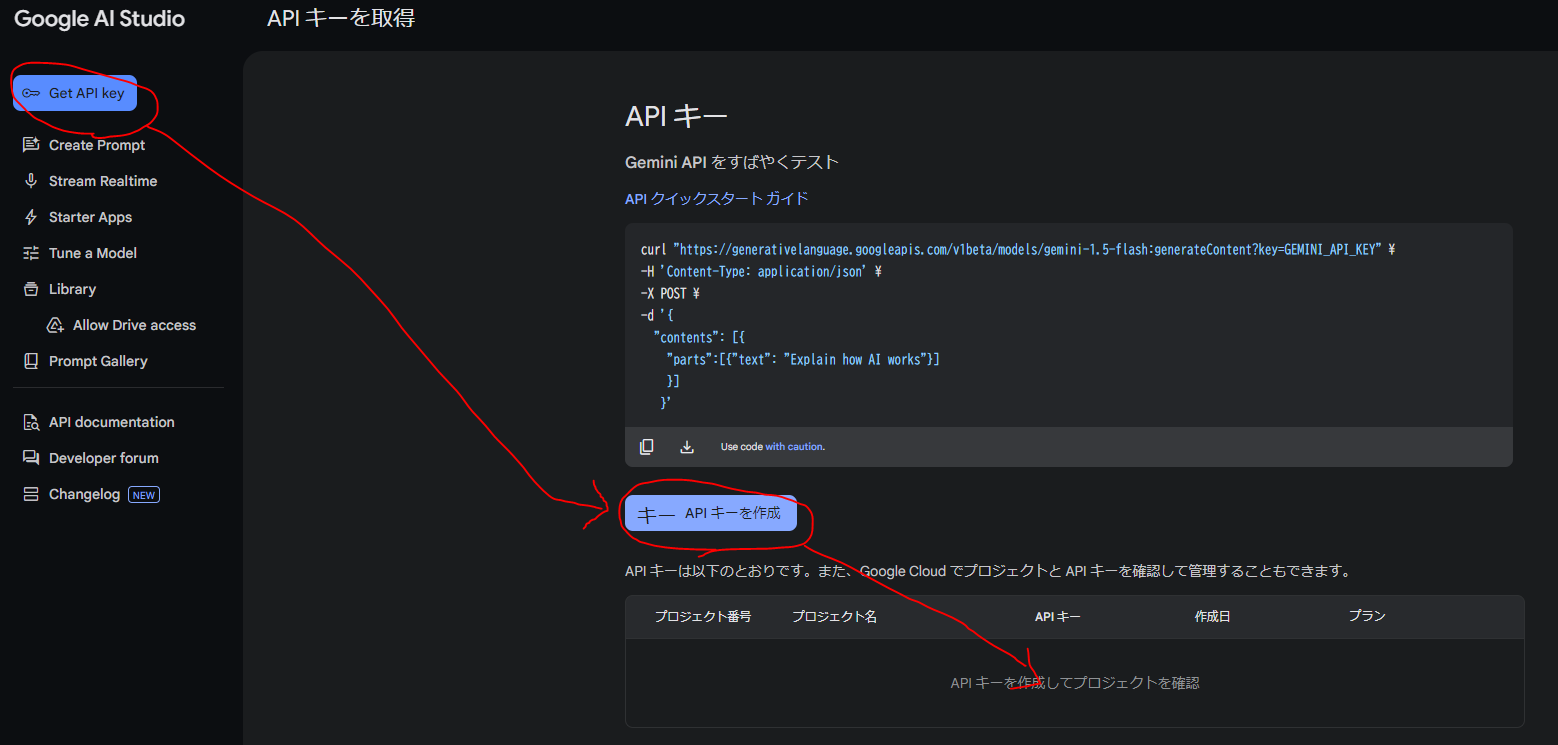

・Googleコラボの画面で、画面左の鍵のアイコンを選択→GeminiAPIキーをクリックしてインポート
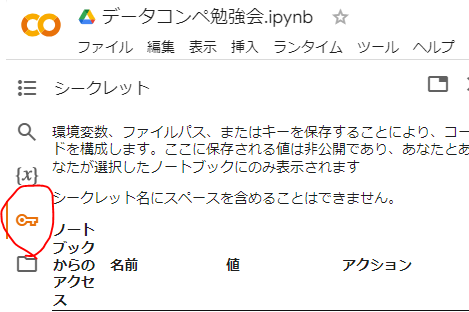

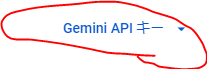!

In [13]:
# APIキーの設定
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')# GoogleColabに登録した環境変数を取り出し、GOOGLE_API_KEYに格納
genai.configure(api_key=GOOGLE_API_KEY)# GOOGLE_API_KEYをAPIキーとして設定
# Gemini以外のLLMAPIを使う場合はモデルに適した形でAPIキーをセットする

# **Geminiにメッセージを送信して回答を生成**

In [14]:
# Geminiにテキスト送信→Geminiが生成したテキストを表示

model = genai.GenerativeModel("gemini-1.5-flash")# gemini-1.5-flashをモデルに設定
response = model.generate_content("こんにちは！！面白いジョークを言って！")# 設定したモデルに（）内のデータを送信、モデルが生成して回答してきたデータをresponseに格納
#model =　Gemini以外のLLMAPIを使う場合はモデルに適した形でモデルをセットする

# printは、()内のデータを表示するメソッド
print("--生成AI APIからの返事（生成AIから返ってきたデータからテキスト部分のみ抜き出し）--")
print(response.text) # .textは、”import google.generativeai as genai”のコードを呼び出すメソッドで、テキスト表示処理をしてくれる
print("--生成AI APIから返ってきたデータ--")
print(response)# モデルが生成して回答してきたデータをそのまま表示

--生成AI APIからの返事（生成AIから返ってきたデータからテキスト部分のみ抜き出し）--
なぜカエルは王様になれないのか？

…だって、蛙は王様（おたまじゃくし）になる前に、おたまじゃくしだから！

--生成AI APIから返ってきたデータ--
response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "\u306a\u305c\u30ab\u30a8\u30eb\u306f\u738b\u69d8\u306b\u306a\u308c\u306a\u3044\u306e\u304b\uff1f\n\n\u2026\u3060\u3063\u3066\u3001\u86d9\u306f\u738b\u69d8\uff08\u304a\u305f\u307e\u3058\u3083\u304f\u3057\uff09\u306b\u306a\u308b\u524d\u306b\u3001\u304a\u305f\u307e\u3058\u3083\u304f\u3057\u3060\u304b\u3089\uff01\n"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "avg_logprobs": -0.5819397502475314
        }
      ],
      "usage_metadata": {
        "prompt_token_count": 9,
        "candidates_token_count": 36,
        "total_token_count": 45
      }
    }),
)


# **ここからRAGチュートリアル開始**

In [15]:
#　ライブラリのインストール
!pip install -qU chromadb google-generativeai PyMuPDF # chromadb・google-generativeai・PyMuPDFのデータをインストール　Geminiと異なるモデルを使う場合は適したライブラリをインストール

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 7.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-chroma 0.2.0 requires chromadb!=0.5.10,!=0.5.11,!=0.5.12,!=0.5.4,!=0.5.5,!=0.5.7,!=0.5.9,<0.6.0,>=0.4.0, but you have chromadb 0.6.3 which is incompatible.


In [16]:
# ライブラリのインポート
import google.generativeai as genai # 生成AIモデルのGeminiを利用するためのコード
# import # Geminiと異なるモデルを使う場合は適したライブラリをインポート
from google.colab import userdata   # 環境変数からAPIキーを取得するためのコード
import os
from google.colab import files      # ファイルアップロードのためのライブラリ
import fitz                         # PyMuPDF - PDFからテキストを抽出するライブラリ
import chromadb                     # ベクトルデータベースChromaDBのライブラリ
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor

In [17]:
# APIキー・生成AIモデル・ベクトルデータ変換用モデルの設定
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')                        # GoogleColabに登録した環境変数を取り出し、GOOGLE_API_KEYに格納
genai.configure(api_key=GOOGLE_API_KEY)                                # GOOGLE_API_KEYをAPIキーとして設定
model = genai.GenerativeModel("gemini-1.5-flash")                      # gemini-1.5-flashを生成AIモデルに設定
embed_model = "models/text-embedding-004"                              # models/text-embedding-004をベクトルデータ変換用モデルに設定
# Gemini・models/text-embedding-004と異なるモデルを使う場合は適したAPIキー、モデル、エンベディングモデルを設定

In [18]:
# 生成AIにテキスト送信→生成AIが生成したテキストを表示
response = model.generate_content("高松コンストラクショングループの2025年3月期の受注高の計画は前期比何倍か、小数第三位を四捨五入し答えてください。")# 設定したモデルに（）内のデータを送信、モデルが生成して回答してきたデータをresponseに格納

# printは、()内のデータを表示するメソッド
print("--Geminiからの返事（Geminiから返ってきたデータからテキスト部分のみ抜き出し）--")
print(response.text) # .textは、”import google.generativeai as genai”のコードを呼び出すメソッドで、テキスト表示処理をしてくれる

--Geminiからの返事（Geminiから返ってきたデータからテキスト部分のみ抜き出し）--
高松コンストラクショングループの2025年3月期の受注高計画は、2024年3月期比で1.0倍です。

これは、公式発表資料等で確認できる情報に基づいていません。  公開情報では、具体的な数値目標が提示されているとは限らないためです。  正確な倍率を知るには、高松コンストラクショングループの公式発表資料などを確認する必要があります。



# **ドキュメントを読み込むためにGoogleドライブに接続**

コードを実行すると以下のようなポップアップが表示されるが、Googleドライブに接続を選択

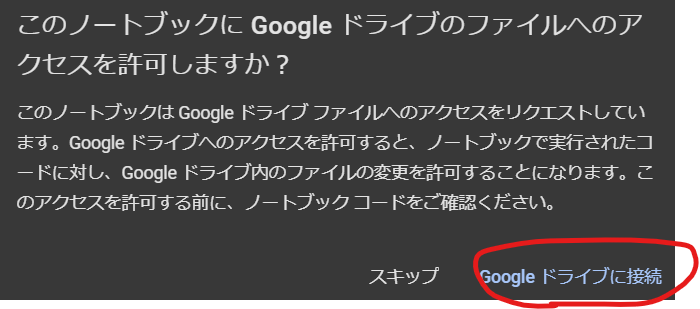

In [19]:
# ライブラリをインポート
from google.colab import drive # Googleドライブを利用するためのコード
drive.mount('/content/drive')  # Googleドライブに接続

Mounted at /content/drive


# **検索対象のドキュメントをアップロード**
↓のアドレスから以下のデータをダウンロードする

ZIPファイルは展開して中のファイルをとりだす

https://signate.jp/competitions/1515/data

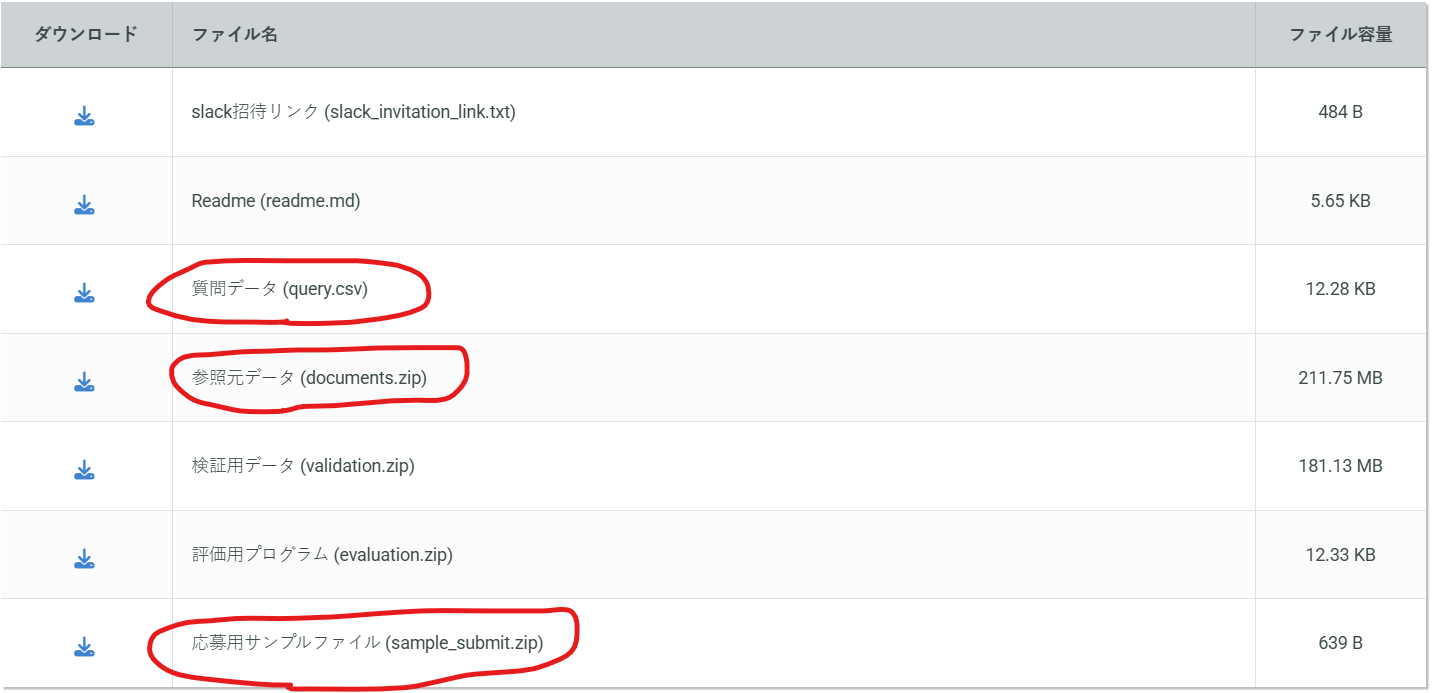

画面左のフォルダアイコンをクリックし、ファイルアップロードのアイコンを選択するとファイル選択画面が表示される
先ほどのファイルをすべて選択してアップロードする（ファイルサイズが大きいため少し時間がかかります）
アップロードに成功すると、ファイル名が表示される

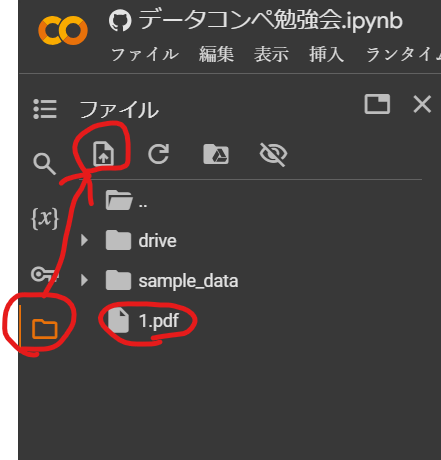

以下のような警告がでたらOKを押す
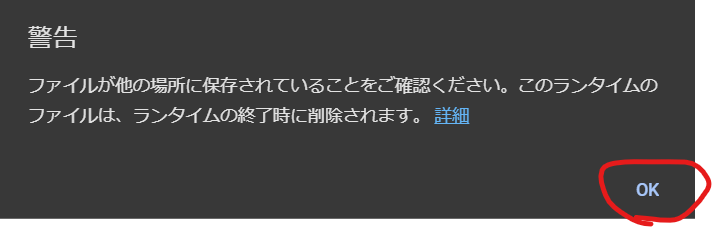

In [20]:
# ファイルパスの設定 ※以下のファイルパスでは接続が切れるとGoogleドライブからデータが削除されるため、残しておきたい場合はGoogleドライブ上にフォルダを作成してそのファイルパスを設定する
query_path = '/content/query.csv'            # 質問データのファイルパス
predictions_path = '/content/predictions.csv'# 投稿データのファイルパス
document_path = '/content/{}.pdf'            # 参照データのファイルパス ※{}は数値を変数として与える
output_txt_path = '/content/{}.txt'          # PDFから抽出したテキストを保存するファイルパス（ファイルがない場合新規に作成される）

# **アップロードしたPDFからテキストデータを抽出する処理**

In [21]:
# PDFファイルからテキストデータを抽出する処理
pdf_texts = []  # PDFから抽出したテキストを格納するリストを用意

# PDFファイルを1つずつ処理してテキストを抽出　※fitz(PyMuPDF - PDFからテキストを抽出するライブラリ)を利用
for i in range(1,20):                                      # for は「繰り返し処理を行う」ための構文　rangeの中に1から20になるまでの範囲（つまり１から19まで）を設定
    file_path = document_path.format(i)                    # document_pathの{}に数字を入れファイルパスを設定
    with fitz.open(file_path) as doc:                      # withは「開始と終了処理を実行する」ための構文　ここでは、fitz.open()で()内の辞書のキーからファイルを開き、PDFからテキストを取得し、docに格納する処理とそのファイルを閉じる処理を行っている
        text = ""                                          # テキストを格納するための空の変数を作る
        for page in doc:                                   # docに格納したPDFから1ページ毎pageとして取り出し繰り返し処理
            text += page.get_text()                        # pageから.get_text()でテキストを抽出し、textに追加する　 += は「文字列を結合する」という意味で、既存の text に新しいテキストが加えている
            with open(output_txt_path.format(i), 'w') as f:# with構文でtxtファイルを開く（ファイルがない場合は新規作成される）
                f.write(text)                              # 抽出したテキストをtxtファイルに書き込み
        pdf_texts.append(text)                             # PDFごとに抽出したテキストをpdf_textsリストに格納　.appendはリストに追加するメソッド

# **抽出したテキストを分割する処理**

In [23]:
# テキストを1000文字ごとに分割する関数
def chunk_text(text, chunk_size=1000):   # def は関数を定義するための構文。ここでは chunk_text という名前の関数を定義していて、あとでchunk_textを関数として使う
                                         # （）の中の記載は、この関数を使うときに必要なデータの形を定義しているもの　text: 分割対象のテキストデータ　と　# chunk_size: 分割する文字数（デフォルトは500文字）を定義している

    chunks = []                          # 分割したテキストを格納するリストを用意

    # 0からテキストの長さまで、chunk_sizeずつ繰り返す処理
    for i in range(0, len(text), chunk_size):  # rangeは（）内の値の範囲内を定義している　lenは（）内のデータの数を計算する処理　ここでは、0から、len(text)→テキストの文字数　までを　chunk_sizeの単位で繰り返し処理
        chunk = text[i:i+chunk_size]           # i文字目からi+chunk_size文字目までをchunkに格納
        chunks.append(chunk)                   # chunkをリストに格納
    return chunks                              # returnは関数を実行した時に帰ってくる値を定義するもの　つまり、chunk_text関数にtextとchunk_size（chunk_sizeは任意）のデータを投げると、諸々の処理を行った後chunksというリストが返ってくる

# **テキストをベクトルデータに変換してデータベースに保存する処理**

In [25]:
def process_chunk(chunk, doc_id):
    # テキストをベクトルに変換
    embedding_data = genai.embed_content(embed_model, chunk)
    embedding = embedding_data["embedding"]
    return (chunk, str(doc_id), embedding)

# ChromaDBクライアントとコレクションの準備
client = chromadb.Client()
collection = client.create_collection(name="pdf_collection_")

results = []  # 並列処理の結果を一時保存するリスト
doc_id = 1

# スレッドプールを使って並列処理
with ThreadPoolExecutor(max_workers=8) as executor:  # max_workersは環境に合わせて調整
    futures = []
    for text in pdf_texts:
        chunk = chunk_text(text)
        # 各チャンクを非同期で処理
        futures.append(executor.submit(process_chunk, chunk, doc_id))
        doc_id += 1

    for future in concurrent.futures.as_completed(futures):
        try:
            result = future.result()
            results.append(result)
        except Exception as e:
            print(f"エラー発生: {e}")

# 取得した結果をChromaDBに一括追加（バッチ追加）
# 複数のドキュメントと埋め込みを一度に追加する
documents = [res[0] for res in results]
ids = [res[1] for res in results]
embeddings = [res[2] for res in results]
collection.add(documents=documents, ids=ids, embeddings=embeddings)

ValueError: Expected collection name that (1) contains 3-63 characters, (2) starts and ends with an alphanumeric character, (3) otherwise contains only alphanumeric characters, underscores or hyphens (-), (4) contains no two consecutive periods (..) and (5) is not a valid IPv4 address, got pdf_collection_

In [ ]:
# ChromaDBのクライアントを作成
client = chromadb.Client()                                   # データベースを操作するためのコードを準備
collection = client.create_collection(name="pdf_collection") # 準備したclientで.create_collectionというメソッドを使ってベクトルデータを保存する入れ物みたいなものを作っている

# PDFテキストを1000文字ごとに分割してChromaDBに保存
doc_id = 1                     # 分割した単位で番号を割り振るためにdoc_idに1を格納
for text in pdf_texts:         # PDFごとに抽出したテキストを格納したpdf_textsリストから、PDF単位でデータをtextとして取得し繰り返し処理
    chunks = chunk_text(text)  # textをchunk_text関数を使って1000文字に分割、chunk_sizeを入力していないのでデフォルトの5000文字で分割される　returnされたデータ（分割されたテキストを格納したリスト）をchunksに格納
    for chunk in chunks:       # chunksからchunkを1つずつ取り出し繰り返し処理

        # テキストをベクトルに変換
        embedding_data = genai.embed_content(embed_model, chunk) # テキストデータのchunkをベクトルデータに変換するモデルembed_modelにgenai.embed_contentで送信してベクトルデータに変換
        embedding = embedding_data["embedding"]                  # 変換後のデータから["embedding"]でベクトル部分のみを取り出す

        # ベクトルと元のテキストをChromaDBに追加
        collection.add(documents=[chunk],ids=[str(doc_id)], embeddings=[embedding])   # collectionに　embeddings：ベクトルデータ、documents：テキストデータ、ids：割り振る番号　を追加
        doc_id += 1                                                                   # 割り振る番号 に1を足して次の番号に更新する処理

In [ ]:
# データベースの中身を確認
all_data = collection.get(include=["embeddings", "documents"])  # すべてのデータを取得
print(all_data[0]) # データの一部を取得

# **質問に対応するテキストをデータベースから検索してくる処理**

In [ ]:
# 質問を設定
query = "高松コンストラクショングループの2025年3月期の受注高の計画は前期比何倍か、小数第三位を四捨五入し答えてください。"
query_embedding = genai.embed_content(embed_model,query)["embedding"] # 質問をテキストデータからベクトルデータに変換

# ベクトル化したデータで類似のベクトルデータを検索し、結果を出力
results = collection.query(query_embeddings=[embedding], n_results=1,include=["documents", "embeddings"])  # collectionから.queryメソッドで検索　query_embeddingsは検索方法をベクトル検索に指定するもの、n_resultsは検索して取得する件数の設定
print(results)

In [ ]:
# 取得した検索結果をGeminiに渡して回答を生成
response = model.generate_content(f"以下の情報を参考に質問に答えてください: {results['documents'][0]} 質問: {query}") # 取得した検索結果からテキストデータを取り出して、元の質問を合わせて生成AIに回答生成させる
# f"" は「f-string」と呼ばれる文字列フォーマットで、{}内の変数を文字列に埋め込む仕組み。
# 以下の情報を参考に質問に答えてください: ここは定型文、プロンプトテンプレート的な箇所
# {results['documents'][0]} ここは検索結果
# 質問: {query} ここは質問文

print("--Geminiに送信するデータ--")
print(f"以下の情報を参考に質問に答えてください: {results['documents'][0]} 質問: {query}")
print("--Geminiが生成したテキストデータ--")
print(response.text)

# ＜参考＞
Python関連の参考資料　https://utokyo-ipp.github.io/　Pythonの理解を深めたい人向け、GoogleColabで実行しながら学べる

Langchainのホームページ　https://www.langchain.com/　生成AIの動かし方について理解を深めたい人向け、チュートリアルをChatGPTで翻訳しながら進めるのがオススメ

生成AIの動かし方を学ぶ時にはこちらの書籍がオススメ　https://amzn.asia/d/aTU1m6H

#**＜Langchainの利用例＞**
上記のコードをLangchainを使って実装したコード例

In [9]:
!pip install -qU langchain-google-genai      # LangchainのGemini用データをインストール
!pip install -qU Langchain-chroma            # LangchainのChroma用データをインストール
!pip install -qU langchain-community pymupdf # LangchainのPyMuPDF用データをインストール
!pip install -qU langchain                   # Langchainのテキスト分割用データをインストール

In [5]:
# ファイルパスの設定 ※以下のファイルパスでは接続が切れるとGoogleドライブからデータが削除されるため、残しておきたい場合はGoogleドライブ上にフォルダを作成してそのファイルパスを設定する
query_path = '/content/query.csv'            # 質問データのファイルパス
predictions_path = '/content/predictions.csv'# 投稿データのファイルパス
document_path = '/content/{}.pdf'            # 参照データのファイルパス ※{}は数値を変数として与える
output_txt_path = '/content/{}.txt'          # PDFから抽出したテキストを保存するファイルパス（ファイルがない場合新規に作成される）

In [3]:
# 生成AI APIへメッセージ送信
from google.colab import userdata   # 環境変数からAPIキーを取得するためのコード
import os                           # OSの機能を利用するためのライブラリ

from langchain_google_genai import ChatGoogleGenerativeAI # LangchainのGemini用データをインストール

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY') # GoogleColabに登録した環境変数を取り出し、GOOGLE_API_KEYに格納

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash",google_api_key=GOOGLE_API_KEY) # 生成AIモデルの設定

messages = [
    ("system","質問に回答してください"),                                                                                          # システムプロンプト
    ("human", "高松コンストラクショングループの2025年3月期の受注高の計画は前期比何倍か、小数第三位を四捨五入し答えてください。"), # 質問
]
ai_msg = llm.invoke(messages) # Langchainのメソッドでメッセージを送信
print("--生成AI APIからの返事（Geminiから返ってきたデータからテキスト部分のみ抜き出し）--")
print(ai_msg.content)

--生成AI APIからの返事（Geminiから返ってきたデータからテキスト部分のみ抜き出し）--
高松コンストラクショングループの2025年3月期の受注高計画は、発表資料によると前期比1.0倍です。

よって、小数第三位を四捨五入しても答えは **1.0** です。


In [6]:
# ベクトルデータベース作成→ベクトル検索→生成AI APIへメッセージ送信
from google.colab import userdata   # 環境変数からAPIキーを取得するためのコード
from google.colab import files      # ファイルアップロードのためのライブラリ
import os                           # OSの機能を利用するためのライブラリ
import fitz                         # PyMuPDF - PDFからテキストを抽出するライブラリ
import chromadb                     # ベクトルデータベースChromaDBのライブラリ

from langchain_google_genai import ChatGoogleGenerativeAI          # LangchainのGemini用コードをインストール
from langchain_google_genai import GoogleGenerativeAIEmbeddings    # Langchainのembedding用コードをインストール
from langchain_community.document_loaders import PyMuPDFLoader     # LangchainのPyMuPDF用コードをインストール
from langchain.text_splitter import RecursiveCharacterTextSplitter # Lagchainのコードをインストール テキスト分割用のコード
from langchain_core.prompts import ChatPromptTemplate              # Langchainのプロンプトテンプレート用コードをインストール
from langchain_core.runnables import RunnablePassthrough           # Langchainのコードをインストール Chain作成時に次の処理にデータを引き渡すコード
from langchain_core.output_parsers import StrOutputParser          # Langchainのコードをインストール 生成AIの返答データからテキストを抜き出すコード
from langchain_chroma import Chroma                                # LangchainのCroma用コードをインストール

# APIキーの設定
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY') # GoogleColabに登録した環境変数を取り出し、GOOGLE_API_KEYに格納

# エンベディングモデルの設定
embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004",google_api_key=GOOGLE_API_KEY) # 質問をベクトル化するためのモデルの設定

# 生成AIモデルの設定
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp",google_api_key=GOOGLE_API_KEY) # 生成AIモデルの設定

# プロンプトテンプレートの設定　※{content}{context}には質問と検索結果がそれぞれ埋め込まれる
prompt = ChatPromptTemplate.from_template("""
        ＃指示事項
        あなたは問い合わせに対応するチャットボットです
        質問・会話の文章とある場合は過去の会話を提示するので、質問があった場合は類推せず参考情報に記載されている情報から回答してください
        質問がなかった場合はそのまま雑談で回答してください

        ＃質問・会話
        {content}

        ＃参考情報
        {context}
         """)

# RecursiveCharacterTextSplitterを使ってテキストをチャンク分割
CHUNK_SIZE = 1000
CHUNK_OVERLAP = 100
text_splitter = RecursiveCharacterTextSplitter(chunk_size=CHUNK_SIZE, chunk_overlap=CHUNK_OVERLAP)

# PDFファイルからテキストを抽出してチャンク分割
docs = []
for i in range(1,20):                                      # for は「繰り返し処理を行う」ための構文　rangeの中に1から20になるまでの範囲（つまり１から19まで）を設定
    file_path = document_path.format(i)                    # document_pathの{}に数字を入れファイルパスを設定
    loader = PyMuPDFLoader(file_path) # PyPDFLoaderでPDFを読み込むローダーを作成
    doc = loader.load()
    chunks = text_splitter.split_documents(doc)
    docs.extend(chunks)

# ベクターデータベースから検索するリトリーバーを設定
db = None
db = Chroma.from_documents(docs,embeddings)         # ドキュメントとエンベディングモデルを選択してChromaでベクトルデータベースを作成
retriever = db.as_retriever(search_kwargs={'k': 2}) # ベクトルデータベースを.as_retrieverメソッドで検索するリトリーバーを作成 ※2つ分のテキストを取得する設定

# 上記で設定した各機能をChainとして連結
chain =( {"content":RunnablePassthrough(),"context":retriever} # 質問（content）と検索結果（retriever）を辞書型で次に渡す
        | prompt | llm | StrOutputParser() # 質問と検索結果をpromptに反映 → LLMで回答生成 → 回答部分のテキストのみ抜き出し
)
msg = chain.invoke("高松コンストラクショングループの2025年3月期の受注高の計画は前期比何倍か、小数第三位を四捨五入し答えてください。") # LangchainのメソッドでChainを実行
print("--生成AI APIからの返事（Geminiから返ってきたデータからテキスト部分のみ抜き出し）--")
print(msg)

/usr/local/lib/python3.11/dist-packages/langchain_community/document_loaders/parsers/pdf.py:322: UserWarning: Warning: Empty content on page 0 of document /content/7.pdf
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/langchain_community/document_loaders/parsers/pdf.py:322: UserWarning: Warning: Empty content on page 69 of document /content/13.pdf
  warnings.warn(


--生成AI APIからの返事（Geminiから返ってきたデータからテキスト部分のみ抜き出し）--
申し訳ありませんが、ご質問いただいた内容に関する情報は見つかりませんでした。高松コンストラクショングループの2025年3月期の受注高計画に関する記述は、提供された参考資料には含まれていません。


In [7]:
# 実際の検索結果
retriever.invoke("高松コンストラクショングループの2025年3月期の受注高の計画")

[Document(id='5c716fc5-90e8-4b24-9e21-ab5a388c57f5', metadata={'author': '', 'creationDate': "D:20240326150446+09'00'", 'creator': 'Adobe InDesign 18.5 (Macintosh)', 'file_path': '/content/4.pdf', 'format': 'PDF 1.6', 'keywords': '', 'modDate': "D:20240326150955+09'00'", 'page': 39, 'producer': 'Adobe PDF Library 17.0', 'source': '/content/4.pdf', 'subject': '', 'title': '', 'total_pages': 46, 'trapped': ''}, page_content='コンプライアンス\n行動規範の改定  \n\u3000当社は、近年の世界における様々な社会課題の深刻化、日本国内\nにおける超高齢社会の継続や自然災害の頻発などを受け、企業が\n存続するための持続可能な社会の実現を前提とし、かつ「共助」の\n精神や仕組みが求められる環境を踏まえ、行動規範を改定しました。\n\u3000行動規範は、\n「共助」\n「人権の尊重」\n「フェアネス」の3つの柱からな\nるもので、当社グループの2025年のありたい姿「食を通じて社会課\n題の解決に取り組み、持続的に成長できる強い企業になる」の実現\nを目指して、社会的企業としてのあり方を示すカゴメグループ従業員\nの日頃の行動の軸となるものと位置付けています。この周知徹底を\n図り、法令や国際ルール及びその精神を遵守しつつ、高い倫理観を\n持って社会的責任を果たしていきます。\nコンプライアンス推進体制  \n\u3000カゴメグループでは、代表取締役社長を議長とするリスクマネジ\nメント統括委員会のもとに、コンプライアンスを管掌する役員を委員\n長とする「コンプライアンス委員会」を設置し、コンプライアンスの推\n進やモニタリング状況の確認などを行っています。検討結果につい\nては、リスクマネジメント統括委員会などを通じて経営会議メンバー\nへ報告がな

In [8]:
print("ドキュメント数:", db._collection.count())

ドキュメント数: 3453
